# Digital House - Data Science a Distancia

## Trabajo Práctico 3

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
<p style="text-align:right;">Junio 2022</p>

---
#### Librerías necesarias

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


#### Style

In [7]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 20
sns.mpl.rcParams['axes.labelsize'] = 18


#### Dataset


Autor: [Islombek Davronov](https://www.kaggle.com/islombekdavronov) - [Credit-scoring data](https://www.kaggle.com/datasets/islombekdavronov/creditscoring-data)

"*The data is collected from the real source and converted to numeric values for better training and classifying the **people who are able or not able to pay** their credits.*"

In [8]:
# levantando el csv de Train
data = pd.read_csv('../Data/data_train.csv')

---
#### Functions for this notebook

In [9]:
def basic_EDA(data, trace=False) :
    u'''
    Basic EDA routine for this practice
    '''
    
    print()
    print("Observaciones", data.shape[0], "Características", data.shape[1])
    display(data.head(5))
    
    print()
    print("Descripción de las características")
    display(data.describe())

    if trace :
        print()
        print("Valores nulos")
        display(data.isnull().sum())

        print()
        print("Tipos de datos")
        display(data.dtypes)
    else :
        if sum(data.isnull().sum()) > 0 :
            raise Exception("ALGO ESTA MAL ...")
    
    # La característica INPS_mln_sum tiene valores enteros, se convierte a ese tipo
    data['INPS_mln_sum'] = data['INPS_mln_sum'].astype(int)
    
    # La característica Score_point es del tipo objet y presenta valores no numéricos
    # al no contar con información sobre su significado se elimina del dataset
    data.drop('Score_point', axis=1, inplace=True)

    # Características que no aportan a la clasificación
    data.drop(['Month_of_birth', 'Day_of_birth'], axis=1, inplace=True)
    
    # to have more legibility
    data['label_means'] = data['label'].map({0 : 'insolvency', 1 : 'pay credit'})    
    
    return data


In [10]:
def show_some_plots(data, columns, target=None, cols=4) :
    u'''
    Display some countplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to count
        target : binary values to split the count; if is None draw a simple countplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    if target != None :
        rows *= 2
    for i, column in enumerate(data[columns]) :
        if target == None :
            plt.subplot(rows, cols, i+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
        else :
            # standar count plot
            plt.subplot(rows, cols, i*2+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
            
            # count by target values
            plt.subplot(rows, cols, i*2+2)
            sns.countplot(data=data, x=column, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
    return

In [11]:
def show_some_hists(data, columns, target=None, cols=4) :
    u'''
    Display some histograms graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show 
        target : binary values to split the count; if is None draw a simple histplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        try :
            plt.subplot(rows, cols, i+1)
            sns.histplot(data=data, x=column, kde=True, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
            plt.ylabel(None);
        except :
            pass
    return

In [12]:
def show_some_boxplots(data, columns, target=None, cols=4) :
    u'''
    Display some boxplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show
        target : binary values to split the histogram; if is None draw a simple histplot
        cols : number of columns for the subplots; default is 4
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        plt.subplot(rows, cols, i+1)
        sns.boxplot(data=data, x=target, y=column, palette="RdYlBu")
        plt.tight_layout();
        plt.xlabel(None);
        plt.ylabel(column);
    return

In [13]:
def basic_plots(data) :
    u'''
    Shows counts plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,40));
    fig.suptitle('\nCaracteríscias y su relación con el objetivo\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_plots(data=data, columns=columns, target='label_means')
    
    return

In [14]:
def basic_hists(data) :
    u'''
    Shows histogrms for this practice
    '''
    
    fig = plt.figure(figsize=(25,25));
    fig.suptitle('\nHistogramas\n', verticalalignment='center', 
                 fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_hists(data=data, columns=columns, target='label_means')

    return

In [15]:
def basic_boxplots(data) :
    u'''
    Shows bosx plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,10));
    fig.suptitle('\nVariación de algunas características según el objetivo (insolvente si o no)\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns=['Age', 'Marital', 'Field', 'Region', 
             'Number_of_credits', 'Linked_cards', 'Score_level', 'Score_class', 'Changed_phone_number']
    show_some_boxplots(data=data, columns=columns, target='label_means', cols=5)

    return

---


In [16]:
class Model() :
    u'''
    Practice plain object
    '''
    def __init__(self, name, model) :
        u'''
        Object intializacion 
        '''
    
        self.name = name
        self.model = model
        self.accuracy = 0
        self.recall = 0
        self.precision = 0
        self.auc_roc = 0
        self.confusion = None
        self.classification_report = None
        return
    

    def predict(self, X_test, y_test, target_names=None) :
        u'''
        Predict values
        '''
        y_pred = self.model.predict(X_test)
        self.accuracy = metrics.accuracy_score(y_test, y_pred)
        self.recall = metrics.recall_score(y_test, y_pred)
        self.precision = metrics.precision_score(y_test, y_pred)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
        self.auc_roc = metrics.auc(fpr, tpr)
        self.confusion = confusion_matrix(y_test, y_pred)
        self.classification_report = classification_report(y_test, y_pred, digits=6,  
                                                        target_names=target_names, 
                                                        output_dict=False)
        return y_pred


In [17]:
def show_metrics(models) :
    u'''
    
    '''
    df = pd.DataFrame()
    for m in models :
        '''
        df = df.append( pd.DataFrame(
            columns=['Modelo', 'Accuracy', 'AUC-ROC'], 
            data=[ m.name, m.accuracy, m.auc_roc ]) )
        '''
        df = pd.concat([df, pd.DataFrame(columns=[['Model', 'Accuracy', 'AUC-ROC']], data=[[ m.name, m.accuracy, m.auc_roc ]])], axis=0)
    display(df)

    for m in models :
        print(m.name)
        print(m.classification_report)
    
    return

In [18]:
def show_confusion_matrix(models, cols=4) :
    u'''
    Display some confusion matrix graphs

    args
        models : list ob models objects
        cols : number of columns for the subplot; default is 4
    
    '''
    
    rows = (len(models) / cols) + 1
    
    for i, m in enumerate(models) :
        plt.subplot(rows, cols, i+1)
        sns.heatmap(pd.DataFrame(data=m.confusion, 
                                 index=['Actual Insolvency', 'Actual Pay credit'],
                                 columns=['Predict Insolvency', 'Predict Pay credit'] ), 
                    annot=True, center=0, fmt='d', cmap='YlGnBu')
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel(None)
        plt.xlabel(None)
        
    return

In [19]:
def show_roc_curve(models, X_test, y_test, cols=4) :
    u'''
    Display some roc curves matrix graphs

    args
        models : list ob models objects
        X_test : 2D array with features
        y_test : 1D array with targets
        cols : number of columns for the subplot; default is 4
    
    '''
    
    rows = (len(models) / cols) + 1
    
    for i, m in enumerate(models) :
        plt.subplot(rows, cols, i+1)
        
        y_pred = m.model.predict_proba(X_test)
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred[:, 1])

        plt.tight_layout();
        plt.axis([0, 1.01, 0, 1.2])
        plt.title(m.name);
        plt.ylabel(None)
        plt.xlabel(None)
        
        df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
        plt.plot(df['fpr'],df['tpr'])
        plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
        
    return

---
#### Exploratory Data Analysis

In [20]:
data = basic_EDA(data)


Observaciones 8707 Características 18


,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,34,1,2,6,2,13,12,1,12,1,0,0.0,0,0,0,-,1
1,0,38,1,1,5,1,10,7,1,13,1,2,0.0,0,0,0,-,1
2,0,35,1,2,4,2,9,8,1,13,4,1,1.0,1,0,0,-,1
3,0,27,1,1,5,2,13,7,1,12,1,2,1.0,0,0,0,-,1
4,0,32,1,2,4,2,10,7,1,13,3,1,2.0,1,0,0,-,1



Descripción de las características


,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Changed_phone_number
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,0.923050,37.690479,1.147468,1.622488,4.540829,1.032043,10.485012,6.360859,1.462157,11.207190,1.119789,1.100838,2.132932,0.957505,0.547491,1.082807,0.112094
std,0.266527,10.750031,0.354592,0.484792,1.053161,0.176125,5.597442,3.405988,0.498594,3.020191,0.366915,0.315294,2.225331,0.201726,1.190702,2.447644,0.344394
min,0.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,29.000000,1.000000,1.000000,4.000000,1.000000,6.000000,3.000000,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,36.000000,1.000000,2.000000,4.000000,1.000000,13.000000,6.000000,1.000000,12.000000,1.000000,1.000000,1.700000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,44.000000,1.000000,2.000000,5.000000,1.000000,14.000000,9.000000,2.000000,13.000000,1.000000,1.000000,2.800000,1.000000,0.000000,0.000000,0.000000
max,1.000000,79.000000,2.000000,2.000000,7.000000,2.000000,22.000000,12.000000,2.000000,14.000000,5.000000,4.000000,86.300000,1.000000,4.000000,11.000000,3.000000


---
#### Some graphs

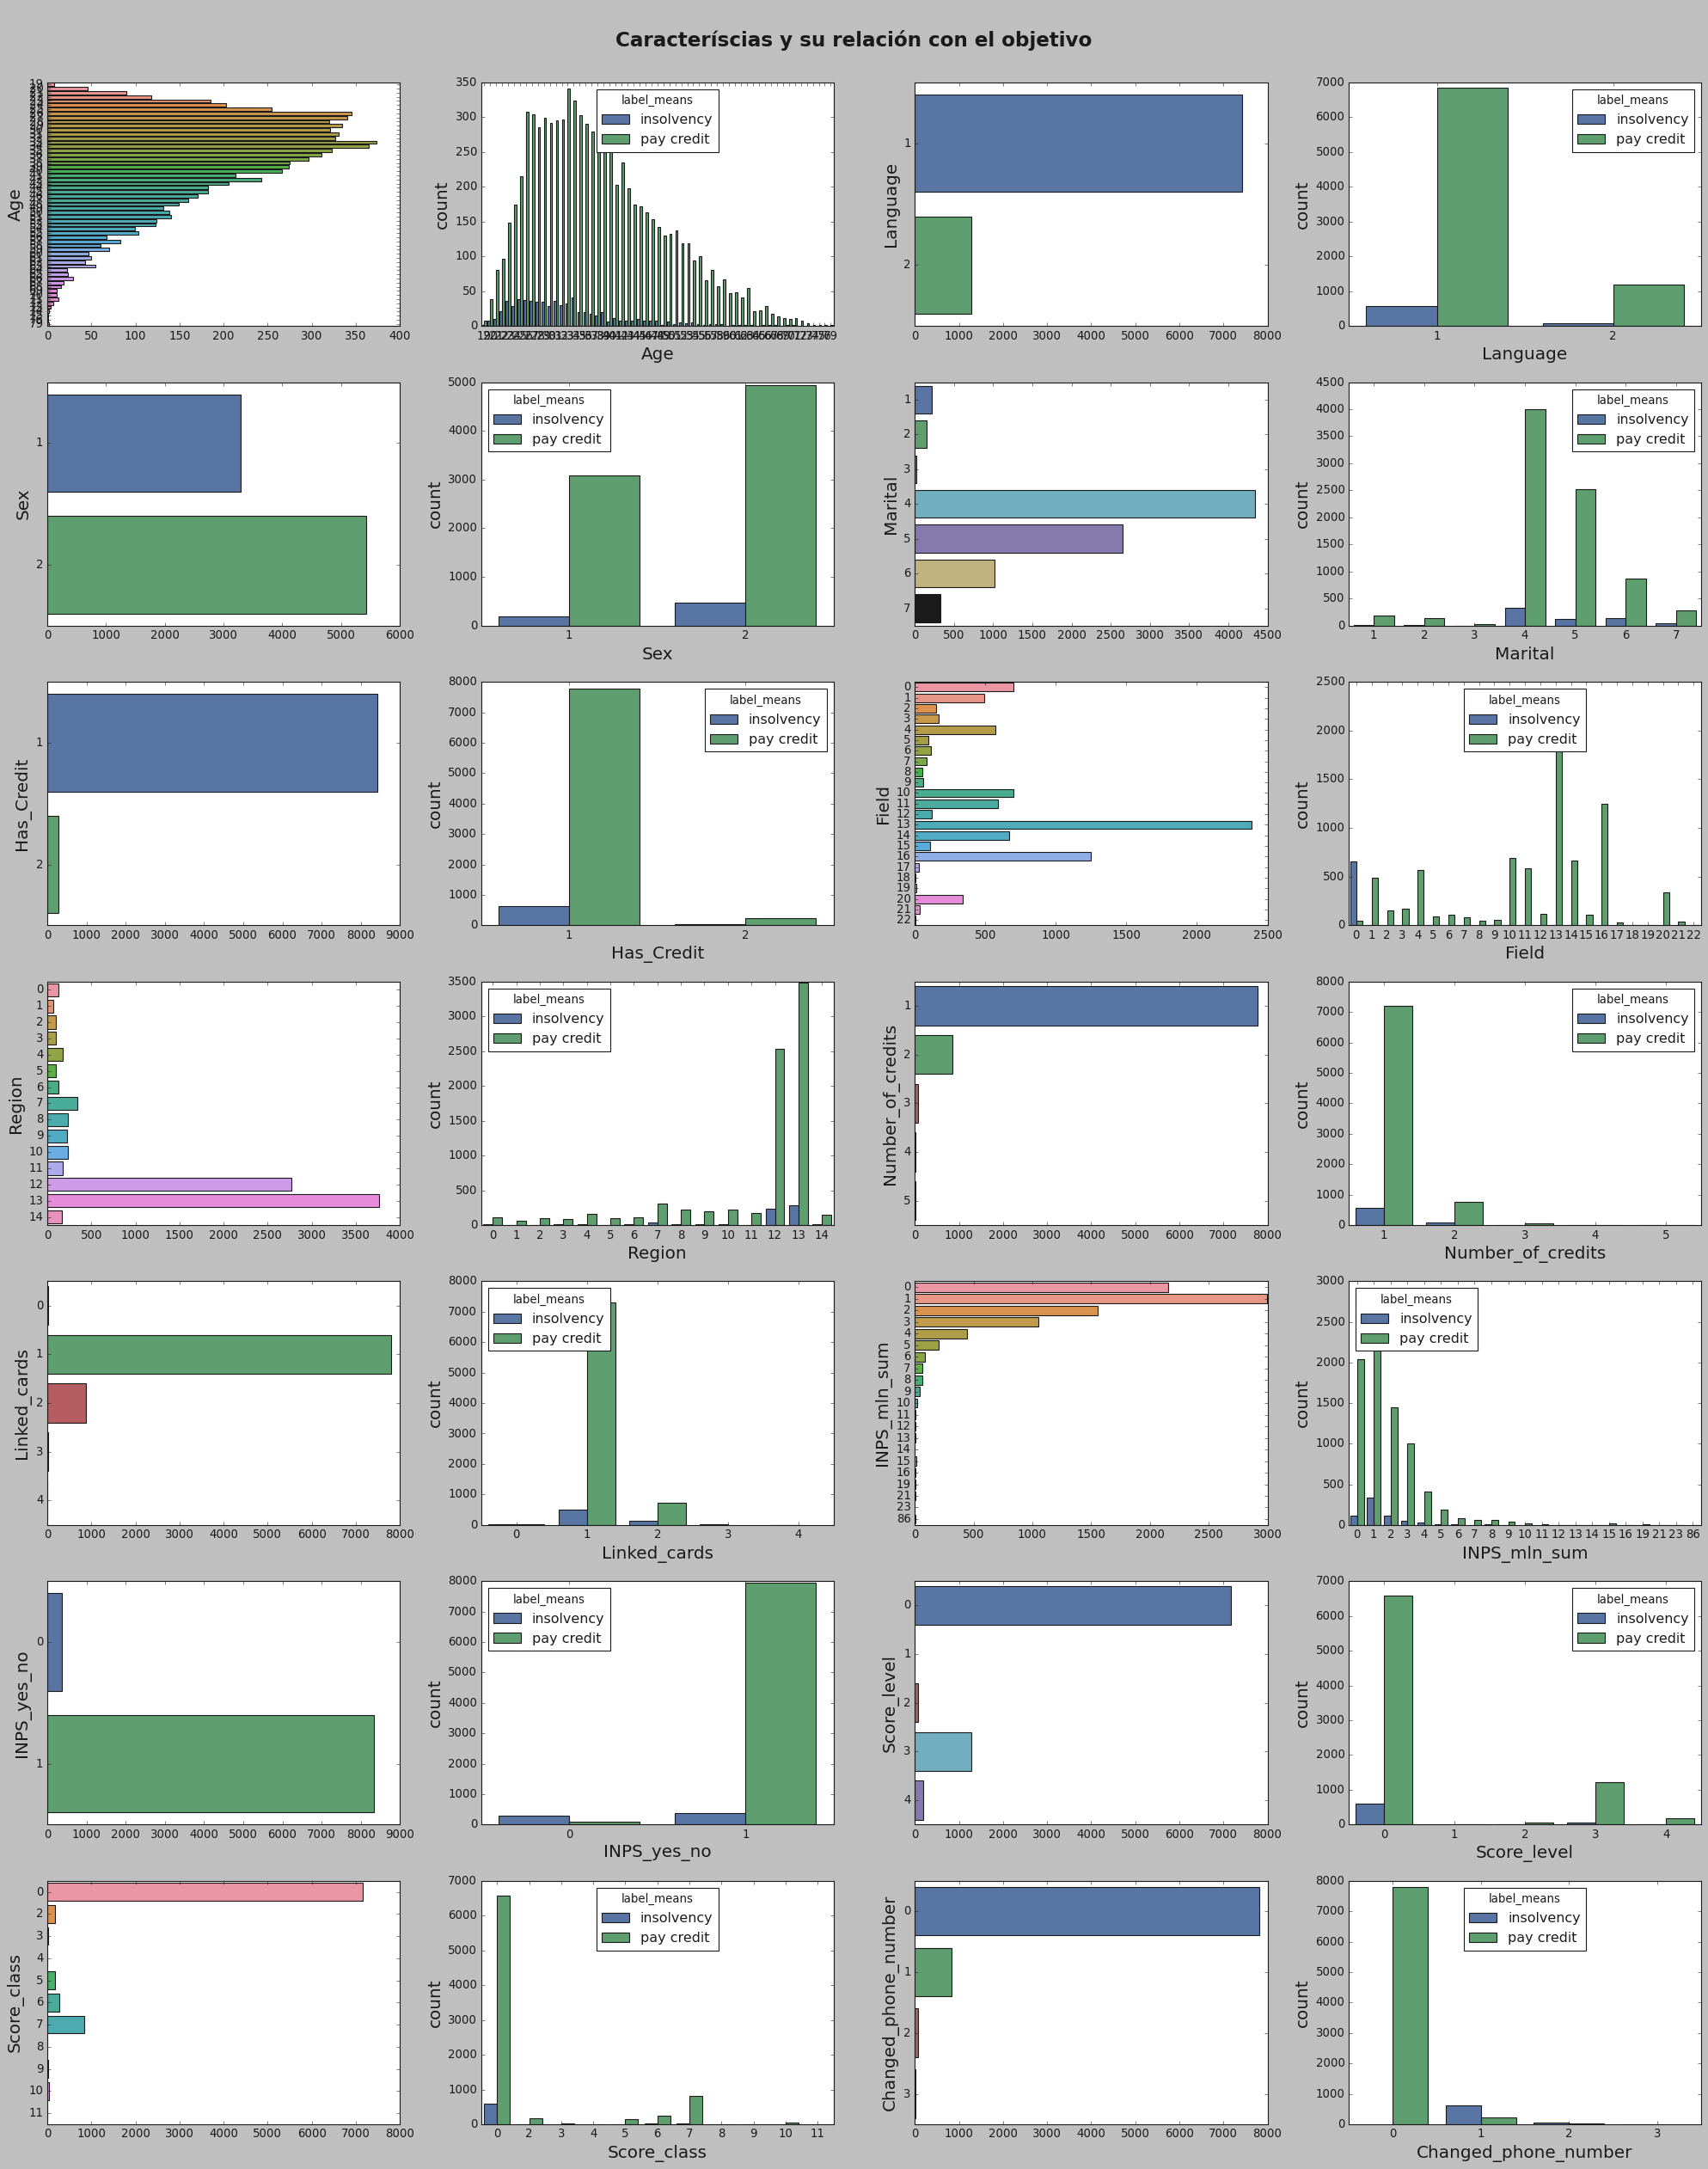

In [21]:
# comentar para saltarse los gráficos

basic_plots(data)

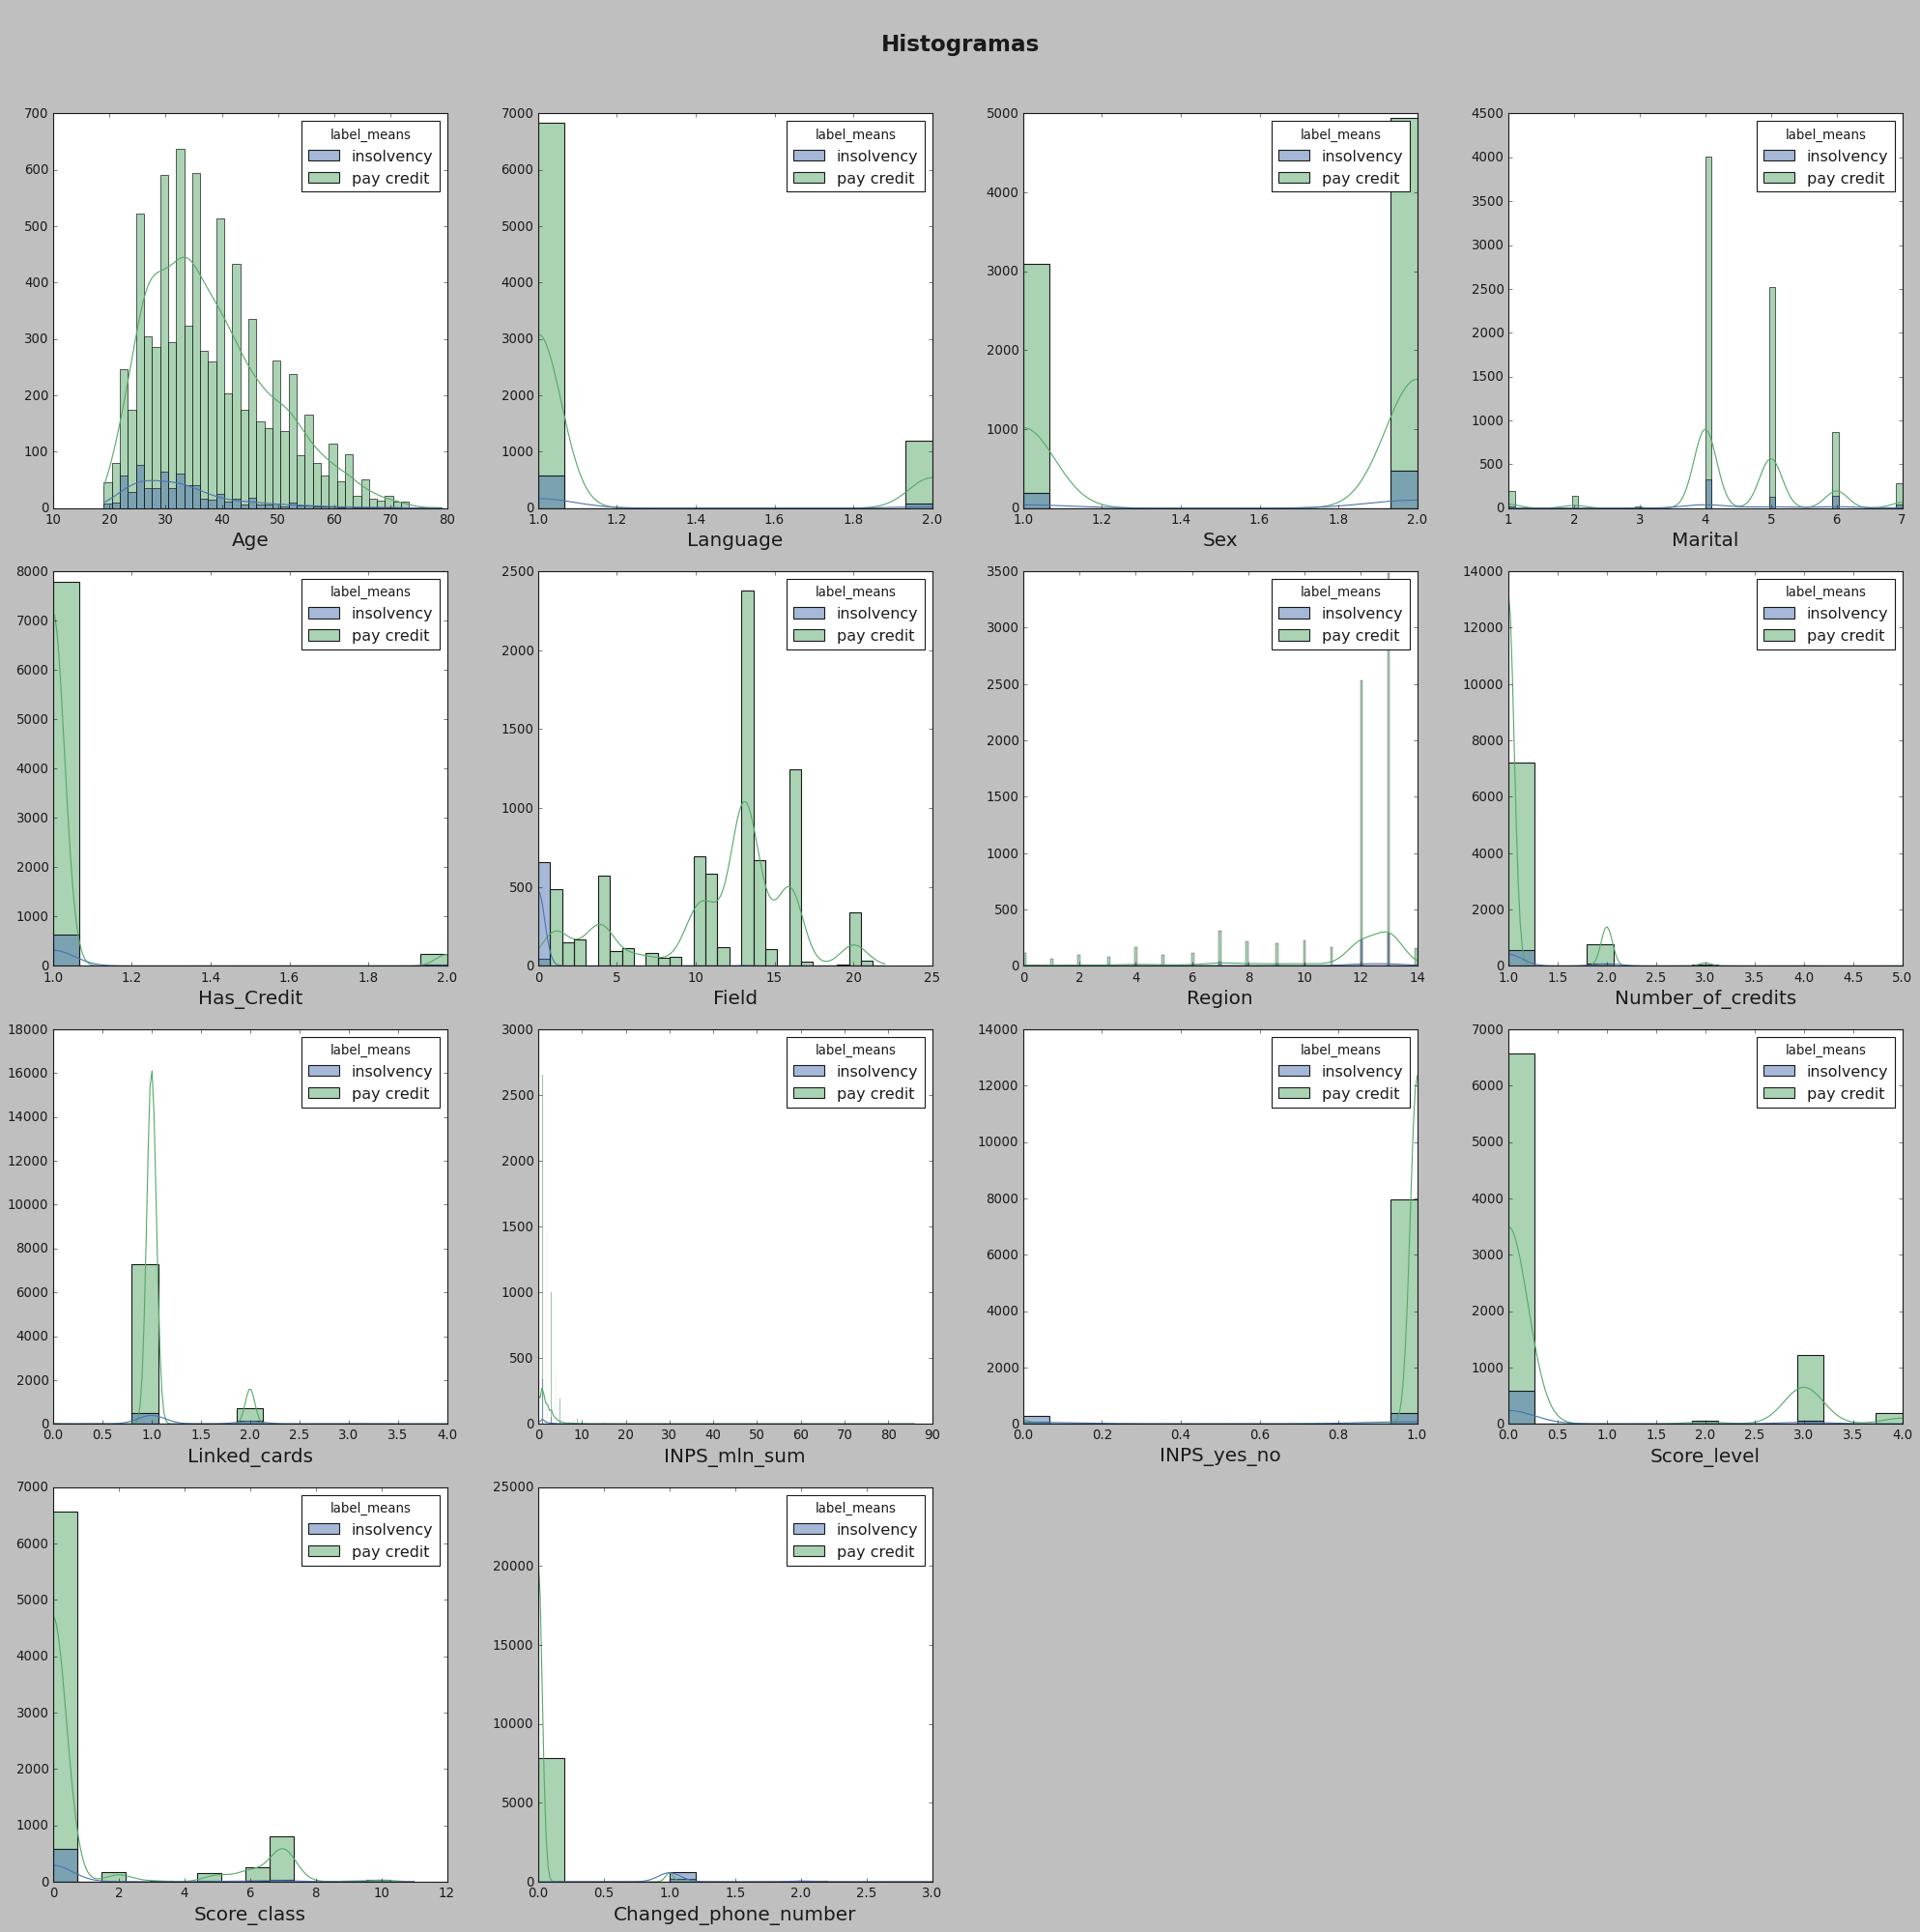

In [22]:
basic_hists(data)

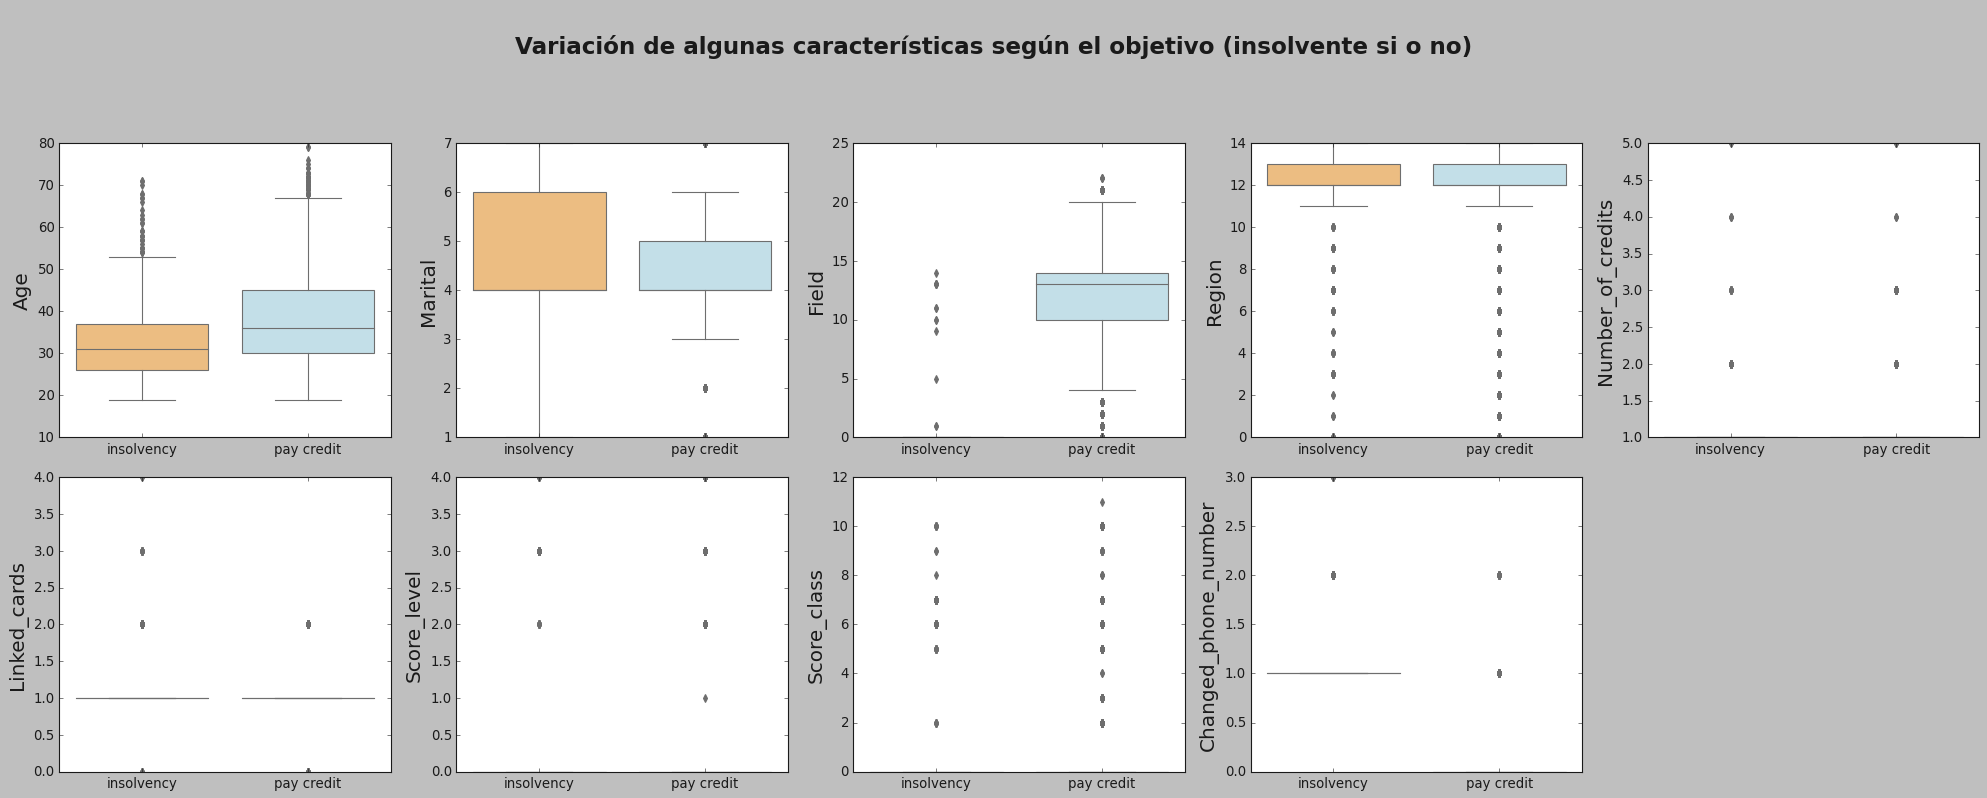

In [23]:
basic_boxplots(data)

---
#### Split data for train and test

In [24]:

X = data.drop(['label', 'label_means'], axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test :", y_test.shape)

X_train: (5833, 14)
y_train: (5833,)
X_test:  (2874, 14)
y_test : (2874,)


---
#### Models

In [25]:
# definir los modelos a entrenar
models = []
models.append( Model('Regresión Logística', LogisticRegression() ) )
models.append( Model('k-vecinos más Cercanos', KNeighborsClassifier() ) )
models.append( Model('Naive Bayes Gaussiano', GaussianNB() ) )


In [26]:
# entrenar los modelos, predecir y capturar los resultados
for m in models :
    m.model.fit(X_train, y_train)
    m.predict(X_test, y_test, target_names=['Insolvency', 'Pay credit'])


---
#### Presentar los resultados

In [27]:
show_metrics(models)

,Model,Accuracy,AUC-ROC
0,Regresión Logística,0.996868,0.991895
0,k-vecinos más Cercanos,0.979123,0.881841
0,Naive Bayes Gaussiano,0.987822,0.993419


Regresión Logística
              precision    recall  f1-score   support

  Insolvency   0.972477  0.986047  0.979215       215
  Pay credit   0.998870  0.997744  0.998307      2659

    accuracy                       0.996868      2874
   macro avg   0.985674  0.991895  0.988761      2874
weighted avg   0.996896  0.996868  0.996878      2874

k-vecinos más Cercanos
              precision    recall  f1-score   support

  Insolvency   0.942857  0.767442  0.846154       215
  Pay credit   0.981475  0.996239  0.988802      2659

    accuracy                       0.979123      2874
   macro avg   0.962166  0.881841  0.917478      2874
weighted avg   0.978586  0.979123  0.978130      2874

Naive Bayes Gaussiano
              precision    recall  f1-score   support

  Insolvency   0.860000  1.000000  0.924731       215
  Pay credit   1.000000  0.986837  0.993375      2659

    accuracy                       0.987822      2874
   macro avg   0.930000  0.993419  0.959053      2874
weighted 

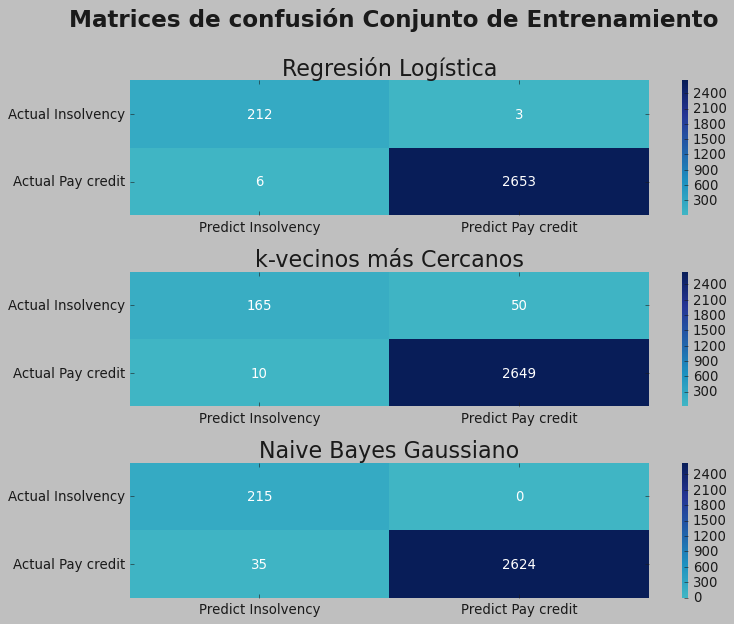

In [28]:
fig = plt.figure(figsize=(10,10));
fig.suptitle('Matrices de confusión Conjunto de Entrenamiento', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_confusion_matrix(models, 1)

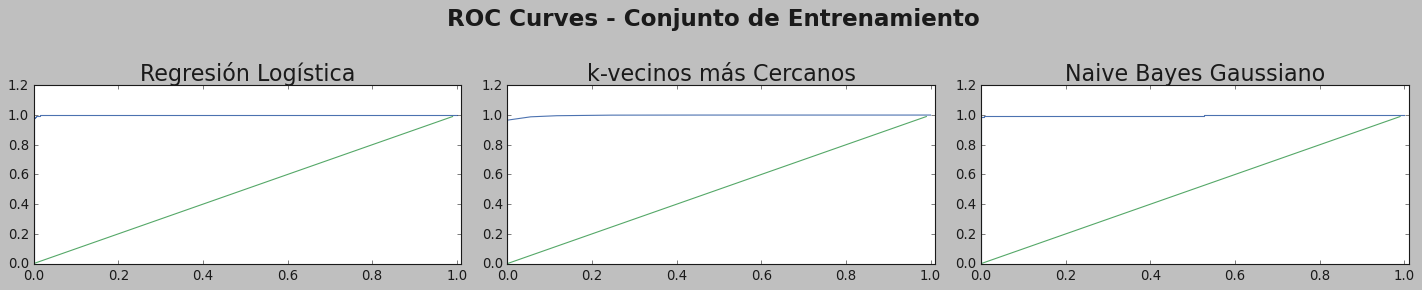

In [29]:
fig = plt.figure(figsize=(18,6));
fig.suptitle('ROC Curves - Conjunto de Entrenamiento', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_roc_curve(models, X_train, y_train, 3)

---
## Conclusiones

### El modelo de Regresión Logística es preferible al Naive Bayes Gaussiano porque predice menos falsos negativos

Naive Bayes Gaussiano no predice falsos positivos, sin embargo el negocio pierde de cobrar intereses por la mayor cantidad de falsos negativos que predice


---
### Predecir con el conjunto de Test provisto por Kaggle


In [30]:
# levantando el csv de Test
test_data = pd.read_csv('../Data/data_test.csv')

In [31]:
# EDA para el conjunto de Test
test_data = basic_EDA(test_data)


Observaciones 48 Características 18


,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Score_point,Changed_phone_number
0,0,40,1,2,4,1,0,3,1,12,2,1,2.4,1,0,0,-,1
1,0,36,2,2,4,1,0,5,1,13,1,2,0.0,1,0,0,-,1
2,0,31,1,2,4,1,0,7,1,13,1,1,0.3,0,0,0,-,2
3,0,29,1,2,4,1,0,1,1,13,1,1,0.9,1,0,0,-,1
4,0,38,1,2,4,1,0,10,1,13,1,2,4.3,0,4,2,318,1



Descripción de las características


,label,Age,Language,Sex,Marital,Has_Credit,Field,Month_of_birth,Day_of_birth,Region,Number_of_credits,Linked_cards,INPS_mln_sum,INPS_yes_no,Score_level,Score_class,Changed_phone_number
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000
mean,0.458333,38.229167,1.125000,1.666667,4.604167,1.0,4.375000,6.375000,1.250000,12.50000,1.229167,1.333333,2.13750,0.791667,0.562500,1.083333,0.604167
std,0.503534,11.143626,0.334219,0.476393,1.215845,0.0,6.125027,3.342982,0.437595,0.71459,0.424744,0.519137,1.58673,0.410414,1.201174,2.386427,0.573885
min,0.000000,22.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,1.000000,10.00000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.500000,1.000000,1.000000,4.000000,1.0,0.000000,3.000000,1.000000,12.00000,1.000000,1.000000,0.80000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,35.000000,1.000000,2.000000,4.000000,1.0,0.000000,7.000000,1.000000,13.00000,1.000000,1.000000,1.85000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,44.750000,1.000000,2.000000,5.250000,1.0,10.000000,9.000000,1.250000,13.00000,1.000000,2.000000,3.15000,1.000000,0.000000,0.000000,1.000000
max,1.000000,69.000000,2.000000,2.000000,7.000000,1.0,20.000000,12.000000,2.000000,13.00000,2.000000,3.000000,5.20000,1.000000,4.000000,8.000000,2.000000


In [32]:
# comentar para saltarse los gráficos

# basic_plots(test_data)

In [33]:
# basic_hists(test_data)

In [34]:
# basic_boxplots(test_data)

In [35]:

test_X = test_data.drop(['label', 'label_means'], axis=1)
test_y = test_data['label']

print("test_X: ", test_X.shape)
print("test_y :", test_y.shape)

test_X:  (48, 14)
test_y : (48,)


In [36]:
# predecir y capturar los resultados sobre el conjunto de Test
for m in models :
    m.predict(test_X, test_y, target_names=['Insolvency', 'Pay credit'])
            

In [37]:
show_metrics(models)

,Model,Accuracy,AUC-ROC
0,Regresión Logística,1.000000,1.000000
0,k-vecinos más Cercanos,0.833333,0.846154
0,Naive Bayes Gaussiano,1.000000,1.000000


Regresión Logística
              precision    recall  f1-score   support

  Insolvency   1.000000  1.000000  1.000000        26
  Pay credit   1.000000  1.000000  1.000000        22

    accuracy                       1.000000        48
   macro avg   1.000000  1.000000  1.000000        48
weighted avg   1.000000  1.000000  1.000000        48

k-vecinos más Cercanos
              precision    recall  f1-score   support

  Insolvency   1.000000  0.692308  0.818182        26
  Pay credit   0.733333  1.000000  0.846154        22

    accuracy                       0.833333        48
   macro avg   0.866667  0.846154  0.832168        48
weighted avg   0.877778  0.833333  0.831002        48

Naive Bayes Gaussiano
              precision    recall  f1-score   support

  Insolvency   1.000000  1.000000  1.000000        26
  Pay credit   1.000000  1.000000  1.000000        22

    accuracy                       1.000000        48
   macro avg   1.000000  1.000000  1.000000        48
weighted 

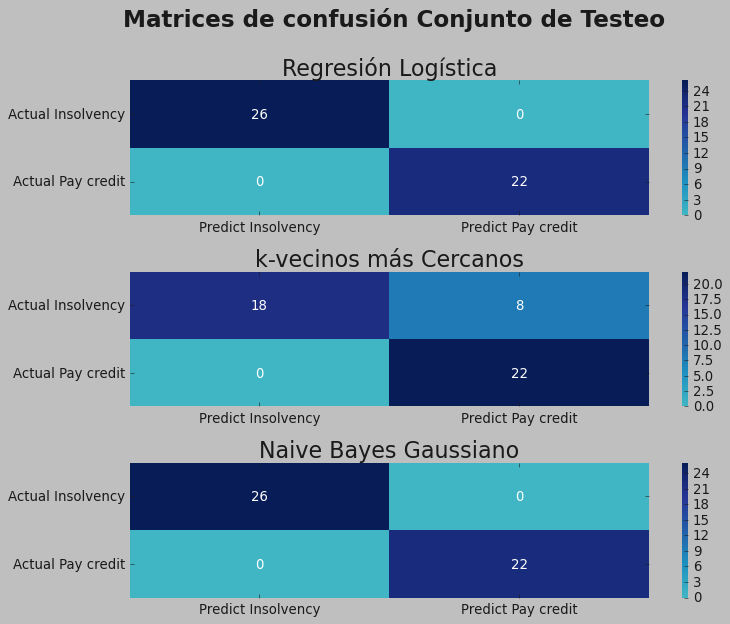

In [38]:
fig = plt.figure(figsize=(10,10));
fig.suptitle('Matrices de confusión Conjunto de Testeo', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_confusion_matrix(models, 1)


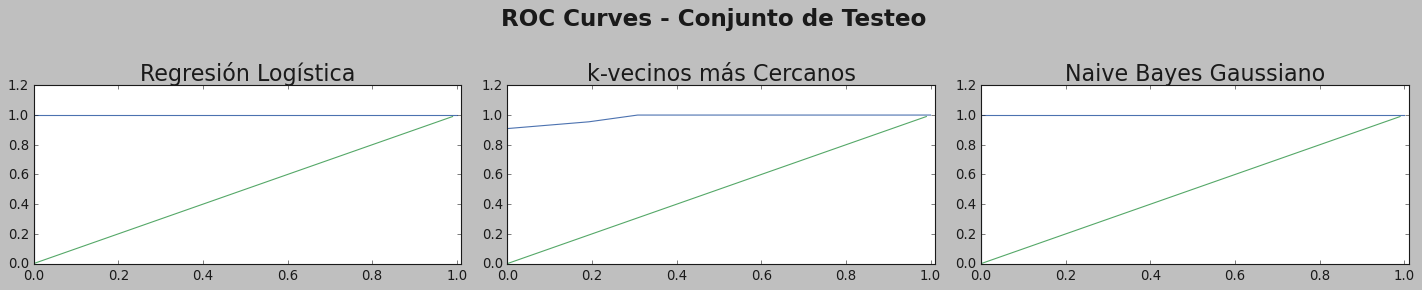

In [39]:
fig = plt.figure(figsize=(18,6));
fig.suptitle('ROC Curves - Conjunto de Testeo', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_roc_curve(models, test_X, test_y, 3)

---